# **<center> Reproducción de Visualizaciones del The Economist </center>**


**Nombre:** Cristian Tobar Morales  
**Asignatura:** Visualización de la información

**Problema a resolver:**  
Para esta tarea trataremos de reproducir dos visualizaciones del The Economist. Para ellos nos enfocaremos en imitar la paleta de colores que ocuparon, las visualizaciones y las anotaciones que incluyen en los gráficos, además de todos los otros detalles de título, subtítulo, etcétera.

**Alcance:**  
Este proyecto tiene fines académicos y está diseñado para mejorar nuestras habilidades de visualización de datos mediante la reproducción de visualizaciones publicadas por The Economist.

**Objetivo:**
El objetivo es replicar la paleta de colores, los tipos de gráficos, las anotaciones y otros detalles como títulos y subtítulos, siguiendo las prácticas y estándares de calidad de The Economist.


### Imagen a reproducir

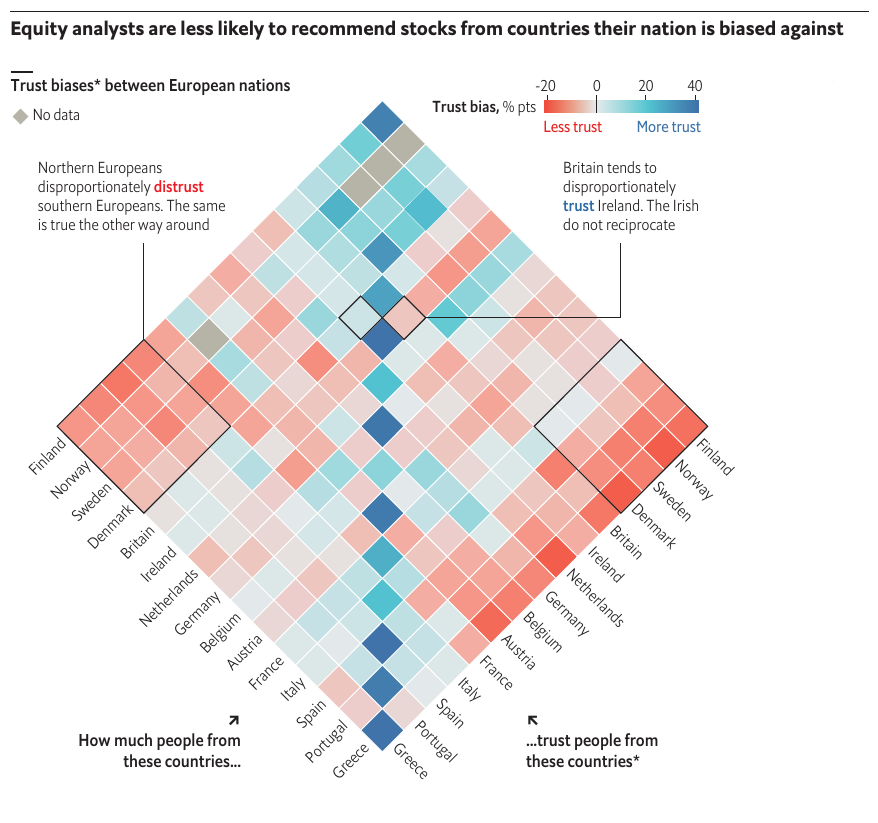

In [9]:
from IPython.display import Image
Image("./images/01-behavioural-finance.png")

#### Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.transforms import Affine2D
from matplotlib.collections import PathCollection
from mpl_toolkits.axisartist.grid_finder import DictFormatter
import mpl_toolkits.axisartist.floating_axes as floating_axes

from flexitext import flexitext # type: ignore
from matplotlib import lines

### Importando Dataset

In [2]:
path = 'data/01-behavioural-finance.csv'
df = pd.read_csv(path)
df.head()

,Origin of trust,Aus,Bel,Den,Fin,Fra,Ger,Gre,Ire,Ita,NL,Nor,Por,Spa,Swe,UK
0,Aus,0.38,-0.00,-0.06,-0.04,-0.05,0.10,-0.02,-0.06,-0.01,-0.04,-0.04,-0.03,-0.04,-0.01,-0.08
1,Bel,-0.03,0.12,-0.02,-0.04,0.02,-0.03,-0.00,-0.01,0.02,-0.03,-0.06,0.01,-0.01,-0.04,-0.04
2,Den,0.05,-0.04,0.31,0.04,-0.08,-0.03,-0.05,0.02,-0.04,0.10,0.22,-0.04,-0.06,0.15,0.05
3,Fin,0.05,-0.04,0.06,0.36,-0.08,-0.07,-0.10,-0.05,-0.12,-0.03,0.16,-0.12,-0.14,0.09,0.03
4,Fra,-0.07,0.04,-0.01,-0.03,0.25,0.06,0.01,0.01,0.05,-0.02,-0.03,0.04,0.04,-0.01,-0.05


### Información general de los datos
Establece la columna 'Origin of trust' como el índice del DataFrame df.
Se crea un nuevo data frame con el indice nuevo

In [3]:
df_new=df.set_index('Origin of trust', drop=True, append=False, inplace=False, verify_integrity=False)
df_new.head()

,Aus,Bel,Den,Fin,Fra,Ger,Gre,Ire,Ita,NL,Nor,Por,Spa,Swe,UK
Origin of trust,,,,,,,,,,,,,,,
Aus,0.38,-0.00,-0.06,-0.04,-0.05,0.10,-0.02,-0.06,-0.01,-0.04,-0.04,-0.03,-0.04,-0.01,-0.08
Bel,-0.03,0.12,-0.02,-0.04,0.02,-0.03,-0.00,-0.01,0.02,-0.03,-0.06,0.01,-0.01,-0.04,-0.04
Den,0.05,-0.04,0.31,0.04,-0.08,-0.03,-0.05,0.02,-0.04,0.10,0.22,-0.04,-0.06,0.15,0.05
Fin,0.05,-0.04,0.06,0.36,-0.08,-0.07,-0.10,-0.05,-0.12,-0.03,0.16,-0.12,-0.14,0.09,0.03
Fra,-0.07,0.04,-0.01,-0.03,0.25,0.06,0.01,0.01,0.05,-0.02,-0.03,0.04,0.04,-0.01,-0.05


### Reordenando los países

In [4]:
#new_order_country = ['Fin', 'Nor', 'Swe', 'Den', 'UK', 'Ire', 'NL','Ger', 'Bel', 'Aus', 'Fra', 'Ita', 'Spa', 'Por', 'Gre']
new_order_country = ['Gre', 'Por','Spa', 'Ita', 'Fra', 'Aus', 'Bel', 'Ger', 'NL', 'Ire', 'UK', 'Den', 'Swe', 'Nor', 'Fin' ]

# reindex para reordenar el dataframe
df_reord = df_new.loc[new_order_country, new_order_country]

print(df_reord)

                  Gre   Por   Spa   Ita   Fra   Aus   Bel   Ger    NL   Ire  \
Origin of trust                                                               
Gre              0.42 -0.02 -0.00  0.01 -0.07 -0.16 -0.13 -0.12 -0.18 -0.07   
Por             -0.03  0.37  0.04  0.04  0.01 -0.10 -0.08 -0.06 -0.10 -0.06   
Spa             -0.04  0.04  0.41  0.05 -0.07 -0.08 -0.07  0.01 -0.05 -0.04   
Ita              0.01  0.00  0.03  0.21  0.06 -0.04 -0.03  0.10  0.01  0.01   
Fra              0.01  0.04  0.04  0.05  0.25 -0.07  0.04  0.06 -0.02  0.01   
Aus             -0.02 -0.03 -0.04 -0.01 -0.05  0.38 -0.00  0.10 -0.04 -0.06   
Bel             -0.00  0.01 -0.01  0.02  0.02 -0.03  0.12 -0.03 -0.03 -0.01   
Ger             -0.02 -0.04 -0.02 -0.00  0.06  0.09 -0.03  0.39  0.00 -0.05   
NL              -0.05 -0.01 -0.02 -0.03 -0.09 -0.06  0.03 -0.02  0.21  0.01   
Ire              0.01  0.01 -0.01  0.06 -0.01 -0.06 -0.04 -0.05 -0.06  0.41   
UK              -0.01  0.01 -0.01  0.03 -0.08 -0.05 

### Renombrar países

In [5]:
#Filas
df_reord.index = ['Greece','Portugal', 'Spain', 'Italy', 'France', 'Austria', 'Belgium',
              'Germany', 'Netherlands', 'Ireland', 'Britain', 'Denmark', 'Sweden',
              'Norway', 'Finland']

#Columnas
df_reord.columns = ['Greece','Portugal', 'Spain', 'Italy', 'France', 'Austria', 'Belgium',
              'Germany', 'Netherlands', 'Ireland', 'Britain', 'Denmark', 'Sweden',
              'Norway', 'Finland']

df_reord.head()

,Greece,Portugal,Spain,Italy,France,Austria,Belgium,Germany,Netherlands,Ireland,Britain,Denmark,Sweden,Norway,Finland
Greece,0.42,-0.02,-0.00,0.01,-0.07,-0.16,-0.13,-0.12,-0.18,-0.07,-0.14,-0.18,-0.13,-0.18,-0.15
Portugal,-0.03,0.37,0.04,0.04,0.01,-0.10,-0.08,-0.06,-0.10,-0.06,-0.05,-0.11,-0.13,-0.13,-0.11
Spain,-0.04,0.04,0.41,0.05,-0.07,-0.08,-0.07,0.01,-0.05,-0.04,-0.13,-0.07,-0.04,-0.05,-0.08
Italy,0.01,0.00,0.03,0.21,0.06,-0.04,-0.03,0.10,0.01,0.01,0.03,-0.00,-0.00,-0.03,0.00
France,0.01,0.04,0.04,0.05,0.25,-0.07,0.04,0.06,-0.02,0.01,-0.05,-0.01,-0.01,-0.03,-0.03


### Paleta de colores

In [6]:
#útil para extraer la paleta de colores y crear un colormap con esos valores
from matplotlib.colors import LinearSegmentedColormap

my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    (0.000, (1.000, 0.357, 0.298)),
    (0.333, (1.000, 1.000, 1.000)),
    (0.666, (0.024, 0.671, 0.820)),
    (1.000, (0.208, 0.349, 0.416))))

### Rotación del gráfico

In [137]:
def rotate_axes(fig, rect, angle):
    tr = Affine2D().scale(1, 1).rotate_deg(angle)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(0, df_reord.shape[0],0, df_reord.shape[0]))

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)

    fig.add_subplot(ax1) 
    ax1.axis[:].set_visible(False)
    aux_ax = ax1.get_aux_axes(tr)
    return aux_ax

### Personalización del gráfico

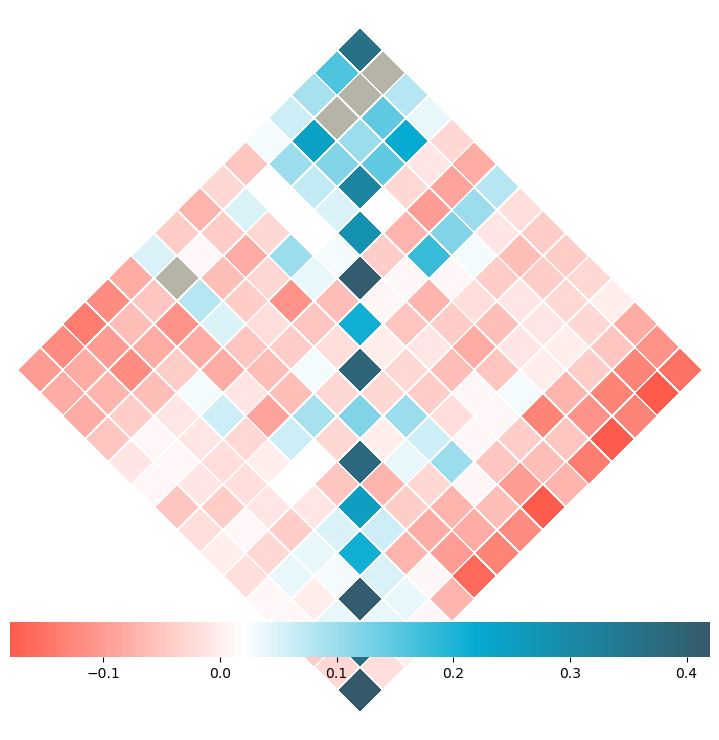

In [216]:
# Figura
fig, ax = plt.subplots(1,1, figsize=(10, 12))

# Ajustar los márgenes de la figura 
plt.subplots_adjust(left=0.2, right=0.9, top=0.8, bottom=0.2) 

# Rotación del gráfico
ax0 = rotate_axes(fig, 111,45)

# Máscara para los valores NaN
mask = pd.isna(df_reord)
my_gradient.set_bad('#b5b4a6')# Establece el color para los valores enmascarados (NaN)

# Crear un mapa de colores personalizado con gris para NaN
sns.heatmap(df_reord, cmap=my_gradient,mask=mask,  square=True, linewidths=0.005, ax=ax0, cbar_kws={"orientation": "horizontal"})
ax.set_axis_off()


# Visualización
plt.show()

### Rotar y mostrar los ejes

In [217]:
# Rotar las etiquetas de los ejes
for t in ax0.get_xticklabels():
    ax0.text(t.get_position()[0], t.get_position()[1], t.get_text(), rotation=-45, ha='left', va='top', fontsize=8.5, fontweight='light')

for t in ax0.get_yticklabels():
    ax0.text(t.get_position()[0], t.get_position()[1], t.get_text(), rotation=45, ha='right', va='top', fontsize=8.5, fontweight='light')

### Titulo y subtitulo 

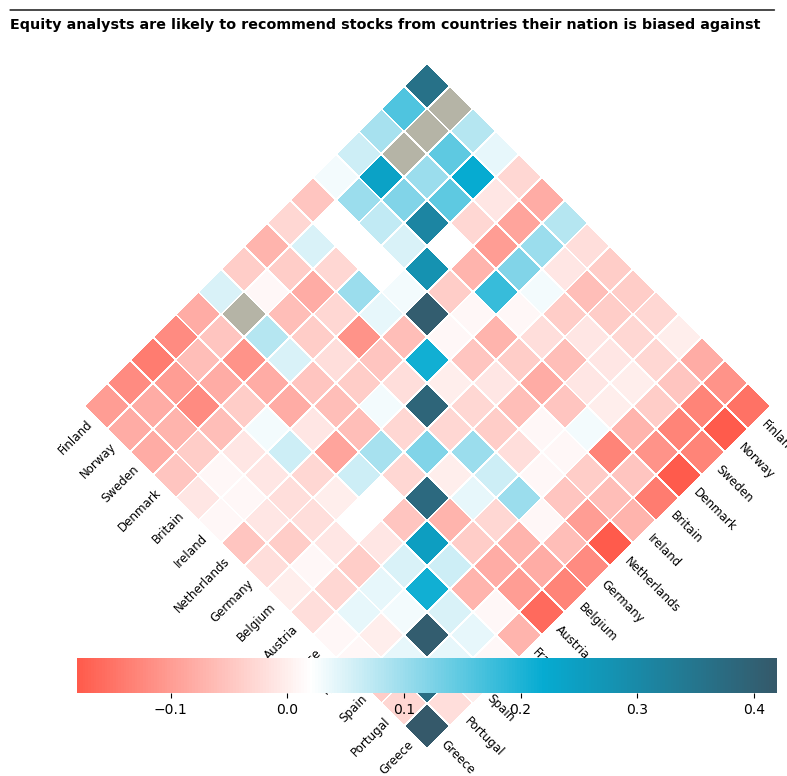

In [218]:
import matplotlib.lines as lines
# Añadir título
ax.annotate('Equity analysts are likely to recommend stocks from countries their nation is biased against', 
            xy=(0.44, 1.02), xycoords='axes fraction', 
            ha='center', va='bottom', fontsize=10.3, fontweight='bold') 

#Agregando la linea sobre el titulo
ax.annotate('', xy=(-0.1, 1.05), xycoords='axes fraction', xytext=(1, 1.05), 
            arrowprops=dict(arrowstyle='-', color='black', lw=1))

fig

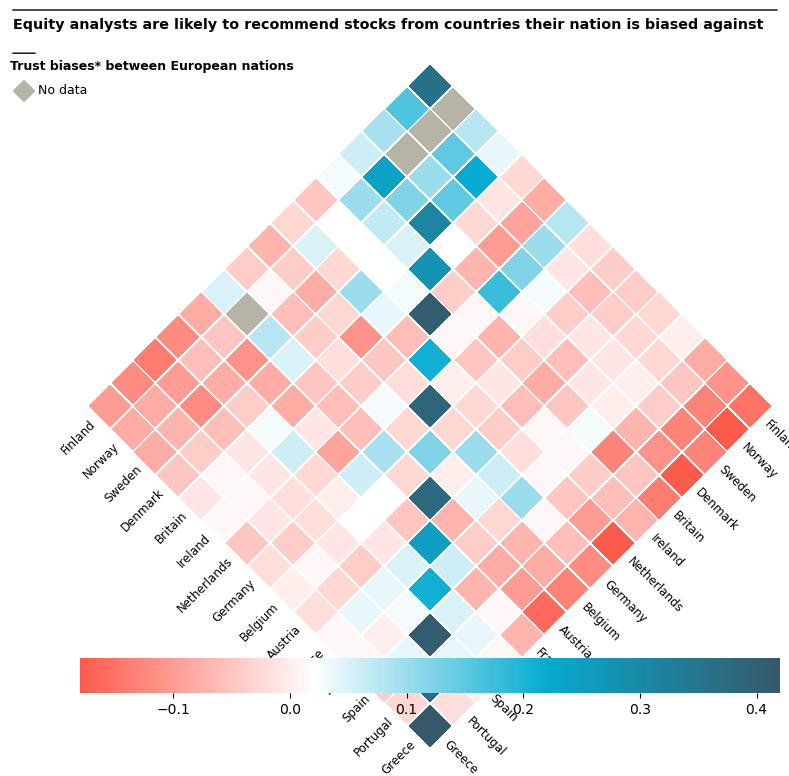

In [219]:
# Agregar un rombo
from matplotlib import patches
diamond = patches.RegularPolygon((-0.08, 0.95), numVertices=4, radius=0.015, color='#b5b4a6', transform=ax0.transAxes)
fig.add_artist(diamond)

# Agregar texto al lado del rombo
ax0.text(-0.06, 0.95, "No data", fontsize=9, ha='left', va='center', color='black', transform=ax0.transAxes)

#Agregando la linea sobre el titulo
ax.annotate('', xy=(-0.1, 0.99), xycoords='axes fraction', xytext=(-0.06, 0.99), 
            arrowprops=dict(arrowstyle='-', color='black', lw=1))

# Agregar texto sobre el rombo gris de "No data"
text = "<size:9><weight:bold>Trust biases* between European nations</></>"
flexitext(-0.1, 0.98, text, va="top", ax=ax, )
fig

### Modificar leyenda

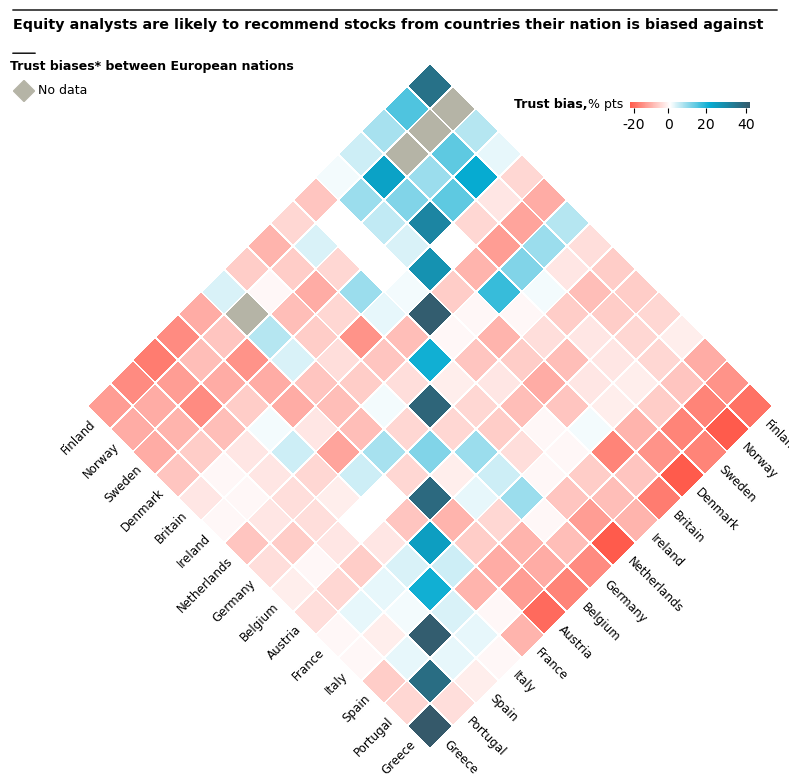

In [220]:
# Modificar la leyenda
colorbar = ax0.collections[0].colorbar
colorbar.set_ticks([-0.16, 0.012, 0.2, 0.4])  # Modificar las marcas
colorbar.set_ticklabels(["-20", "0", "20", "40"])  # Cambiar las etiquetas de las marcas
colorbar.ax.set_position([0.75, 0.433, 0.12, 0.32]) # [x0, y0, ancho, alto]
colorbar.ax.yaxis.set_ticks_position('right')


# Agregar texto al lado de la leyenda
ax0.text(0.62, 0.93, "Trust bias, ", fontsize=9, ha='left', va='center', fontweight='bold', color='black', transform=ax0.transAxes)
ax0.text(0.72, 0.93, " % pts", fontsize=9, ha='left', va='center', color='black', transform=ax0.transAxes)

fig

### Agregar texto al gráfico

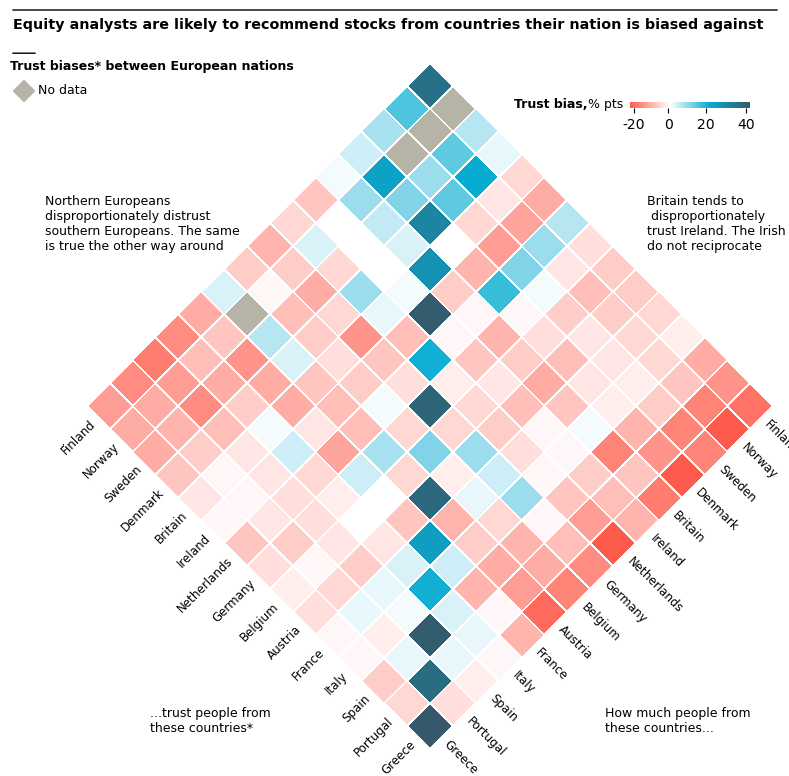

In [221]:
ax0.text(0.81, 0.76, 
        "Britain tends to\n disproportionately\n"
        "trust Ireland. The Irish\n"
        "do not reciprocate", 
        fontsize=9, 
        ha='left', va='center', 
        color='black', 
        transform=ax0.transAxes)

ax0.text(-0.05, 0.76, 
        "Northern Europeans\ndisproportionately distrust\n"
        "southern Europeans. The same\n"
        "is true the other way around", 
        fontsize=9, 
        ha='left', va='center', 
        color='black', 
        transform=ax0.transAxes)

ax0.text(0.1, 0.05,
        "How much people from\n"
        "these countries...", 
        fontsize=9, 
        ha='left', va='center', 
        color='black', 
        transform=ax0.transAxes)

ax0.text(0.75, 0.05, 
        "...trust people from\n"
        "these countries*", 
        fontsize=9, 
        ha='left', va='center', 
        color='black', 
        transform=ax0.transAxes)

fig
